#### This file contains:  
1.MinMaxScaler   
2.Ordinalencodor  
3.ColumnTransformer

### 1. MinMaxScaler

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('data/Amazon Sale Report.csv')

/tmp/ipykernel_13587/2490074937.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/Amazon Sale Report.csv')


In [6]:
df.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_df=scaler.fit_transform(df[['Amount']])

In [27]:
sc_df = pd.DataFrame(scaled_df, 
                     columns=['Amount'], 
                     index=df.index)
sc_df.head()

,Amount
0,0.115978
1,0.072708
2,0.058918
3,0.134909
4,0.102794


In [31]:
s_new=sc_df.drop(np.arange(1000,len(sc_df)))

In [36]:
s_new.dropna(inplace=True)
s_new.info()
s_new.shape

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  930 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


(930, 1)

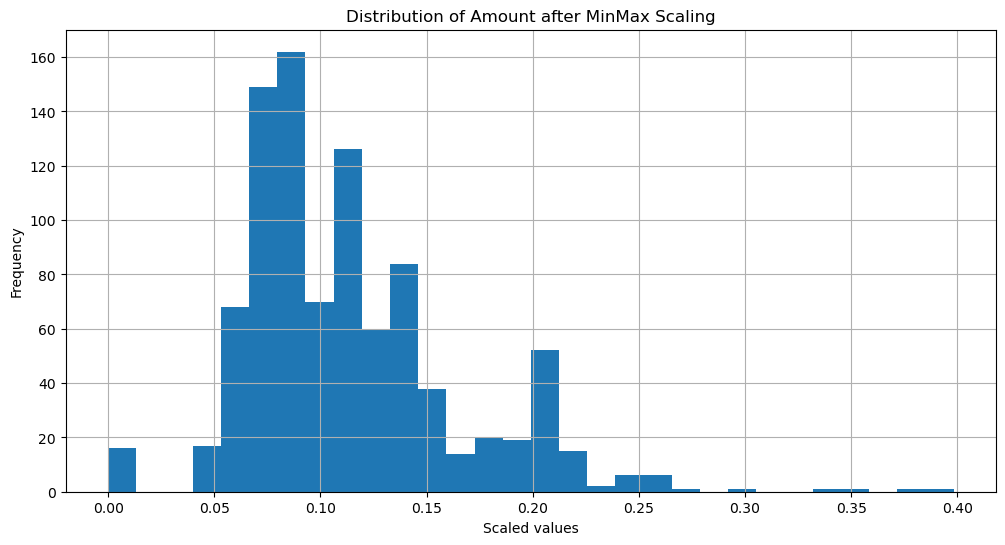

In [39]:
plt.figure(figsize=(12,6))
s_new['Amount'].hist(bins=30)
plt.xlabel("Scaled values")
plt.ylabel("Frequency")
plt.title("Distribution of Amount after MinMax Scaling")
plt.show()


In [7]:
(df['ship-service-level']).value_counts()

ship-service-level
Expedited    88615
Standard     40360
Name: count, dtype: int64

In [11]:
ord=OrdinalEncoder(categories=[['Expedited','Standard']],dtype=int)
x_ord=ord.fit_transform(df[['ship-service-level']])